In [1]:
import species
species.__version__

'0.4.0'

In [2]:
species.SpeciesInit()
database = species.Database()

Initiating species v0.4.0... [DONE]
Database: /Users/wbalmer/diskShapers/bayesianPhotometry/species_database.hdf5
Data folder: /Users/wbalmer/diskShapers/bayesianPhotometry/data
Working folder: /Users/wbalmer/diskShapers/bayesianPhotometry
Creating species_database.hdf5... [DONE]


In [3]:
model_choice = 'bt-settl'

In [4]:
database.add_model(model=model_choice, teff_range=(2000., 4000.))

Unpacking BT-Settl model spectra (227 MB)... [DONE]
Adding BT-Settl model spectra... [DONE]                              
Grid points stored in the database:
   - Teff = [2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900. 3000. 3100.
 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000.]
   - log(g) = [3.5 4.  4.5 5.  5.5]
Number of grid points per parameter:
   - teff: 21
   - logg: 5
Fix missing grid points with a linear interpolation:
Number of stored grid points: 105
Number of interpolated grid points: 0
Number of missing grid points: 0


In [5]:
database.add_model(model='blackbody', teff_range=(100.,4000.))

Unpacking blackbody model spectra (56 MB)... [DONE]
Adding blackbody model spectra... [DONE]                       
Grid points stored in the database:
   - Teff = [ 100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.  650.
  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150. 1200. 1250.
 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750. 1800. 1850.
 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 2300. 2350. 2400. 2450.
 2500. 2550. 2600. 2650. 2700. 2750. 2800. 2850. 2900. 2950. 3000. 3050.
 3100. 3150. 3200. 3250. 3300. 3350. 3400. 3450. 3500. 3550. 3600. 3650.
 3700. 3750. 3800. 3850. 3900. 3950. 4000.]
Number of grid points per parameter:
   - teff: 79
Number of stored grid points: 0
Number of interpolated grid points: 0
Number of missing grid points: 0


/opt/anaconda3/envs/magao/lib/python3.9/site-packages/species/util/data_util.py:278: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


In [6]:
database.add_companion(name='HD 142527 B')

Adding Vega spectrum... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding object: HD 142527 B
   - Distance (pc) = 159.26 +/- 0.72
   - Paranal/NACO.J:
      - Apparent magnitude = 10.86 +/- 0.05
      - Flux (W m-2 um-1) = 1.37e-13 +/- 6.31e-15
   - Paranal/NACO.H (2 values):
      - Apparent magnitude = 10.50 +/- 0.20
      - Flux (W m-2 um-1) = 7.35e-14 +/- 1.36e-14
      - Apparent magnitude = 10.30 +/- 0.50
      - Flux (W m-2 um-1) = 8.83e-14 +/- 4.21e-14
   - Paranal/NACO.Ks (2 values):
      - Apparent magnitude = 10.00 +/- 0.30
      - Flux (W m-2 um-1) = 4.60e-14 +/- 1.29e-14
      - Apparent magnitude = 9.80 +/- 0.10
      - Flux (W m-2 um-1) = 5.53e-14 +/- 5.10e-15
   - Paranal/NACO.Lp (2 values):
      - Apparent magnitude = 9.10 +/- 0.10
      - Flux (W m-2 um-1) = 1.21e-14 +/- 1.11e-15
      - Apparent magn

In [6]:
# cugno cont flux
# 7.4+1.4−2.1 ×10−14
# my contrast
# 7.29 0.069

# claudi
# Y= 5.34±0.21 mag, J= 5.10±0.17 mag, and H= 4.23±0.19 mag
# K1 K2 3.72±0.01 3.71±0.02

In [7]:
import numpy as np
def appmag(M, d):
    m = M + 5*np.log10(d)-5
    return m
d = (156,0.7)
oldd = (140,20)

Y = appmag(5.34, oldd[0])
Yerr = Y*(0.21/5.34)

J = appmag(5.10, oldd[0])
Jerr = J*(0.17/5.10)

H = appmag(4.23, oldd[0])
Herr = H*(0.19/4.23)

K1 = appmag(3.72, oldd[0])
K1err = K1*(0.01/3.72)

K2 = appmag(3.71, oldd[0])
K2err = K2*(0.02/3.71)

mags = {'LCO/VisAO.Hac':(8.1+7.29,(0.069/7.29)*(8.1+7.29)),
#         'Paranal/SPHERE.IRDIS_B_Y':(Y,Yerr),
#         'Paranal/SPHERE.IRDIS_B_J':(J,Jerr),
#         'Paranal/SPHERE.IRDIS_B_H':(H,Herr),
#         'Paranal/SPHERE.IRDIS_D_K12_1':(K1, K1err),
#         'Paranal/SPHERE.IRDIS_D_K12_2':(K2, K2err),
#         'Paranal/NACO.Lp':(9.10,0.10),
#         'Paranal/NACO.Mp':(9.20,0.20),
       }

In [8]:
database.add_object('HD 142527 B',
                    distance=d,
                    app_mag=mags,
#                     spectrum={
#                               'GPI\\_J': ('betapicb_gpi_j.dat', None, 40.),
#                               },
                    deredden=None)

Adding filter: LCO/VisAO.Hac... [DONE]
Adding object: HD 142527 B
   - Distance (pc) = 156.00 +/- 0.70
   - LCO/VisAO.Hac:
      - Apparent magnitude = 15.39 +/- 0.15
      - Flux (W m-2 um-1) = 1.59e-14 +/- 2.14e-15


In [9]:
inc_phot = inc_phot = ['LCO/VisAO.Hac', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.Ks', 'Paranal/NACO.Lp', 'Paranal/NACO.Mp'] #list(mags.keys())

In [10]:
fit = species.FitModel(object_name='HD 142527 B',
                       model='bt-settl',
                       bounds={'teff': (2000., 3500.),
                               'radius': (1., 5.),
                               'disk_teff':(1000., 2000.),
                               'disk_radius': (10., 100.),
                              },
                       inc_phot=inc_phot,
                       inc_spec=False,
                       weights=None)



Interpolating LCO/VisAO.Hac... [DONE]
Interpolating Paranal/NACO.J... [DONE]
Interpolating Paranal/NACO.H... [DONE]
Interpolating Paranal/NACO.Ks... [DONE]
Interpolating Paranal/NACO.Lp... [DONE]
Interpolating Paranal/NACO.Mp... [DONE]
Interpolating LCO/VisAO.Hac... [DONE]
Interpolating Paranal/NACO.J... [DONE]
Interpolating Paranal/NACO.H... [DONE]
Interpolating Paranal/NACO.Ks... [DONE]
Interpolating Paranal/NACO.Lp... [DONE]
Interpolating Paranal/NACO.Mp... [DONE]
Fitting 5 parameters:
   - teff
   - logg
   - radius
   - disk_teff
   - disk_radius
Prior boundaries:
   - teff = (2000.0, 3500.0)
   - radius = (1.0, 5.0)
   - disk_teff = (1000.0, 2000.0)
   - disk_radius = (10.0, 100.0)
   - logg = (3.5, 5.5)
Weights for the log-likelihood function:
   - LCO/VisAO.Hac = 1.00e+00
   - Paranal/NACO.J = 1.00e+00
   - Paranal/NACO.H = 1.00e+00
   - Paranal/NACO.Ks = 1.00e+00
   - Paranal/NACO.Lp = 1.00e+00
   - Paranal/NACO.Mp = 1.00e+00


In [11]:
fit.run_ultranest(tag='142',
                  min_num_live_points=500,
                  output='ultranest',
                  prior={'mass': (250., 50.)}
                 )

Running nested sampling with UltraNest...
Creating directory for new run ultranest/run36
[ultranest] Sampling 500 live points from prior ...


/opt/anaconda3/envs/magao/lib/python3.9/site-packages/ultranest/store.py:195: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'points', dtype=np.float,


[ultranest] Explored until L=2e+02  9 [243.2201..243.2208]*| it/evals=10350/43301 eff=24.1817% N=500  0 
[ultranest] Likelihood function evaluations: 43345
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 227.3 +- 0.1085
[ultranest] Effective samples strategy satisfied (ESS = 3364.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
Log-evidence = 227.24 +/- 0.22
Best-fit parameters (mean +/- std):
   - teff = 3.38e+03 +/- 6.54e+01
   - logg = 4.39e+00 +/- 1.18e-01
   - radius = 4.85e+00 +/- 1.39e-01
   - disk_teff = 1.99e+03 +/- 8.09e+00
   - disk_radius = 2.73e+01 +/- 6.31e-01
Maximum likelihood sample:
   - Log-likelihood = 243.69
   - teff = 3369.83
   - l

Median sample:
   - teff = 3.38e+03
   - logg = 4.41e+00
   - radius = 4.90e+00
   - disk_teff = 1.99e+03
   - disk_radius = 2.73e+01
   - distance = 1.56e+02
Plotting the posterior: posterior.png... [DONE]


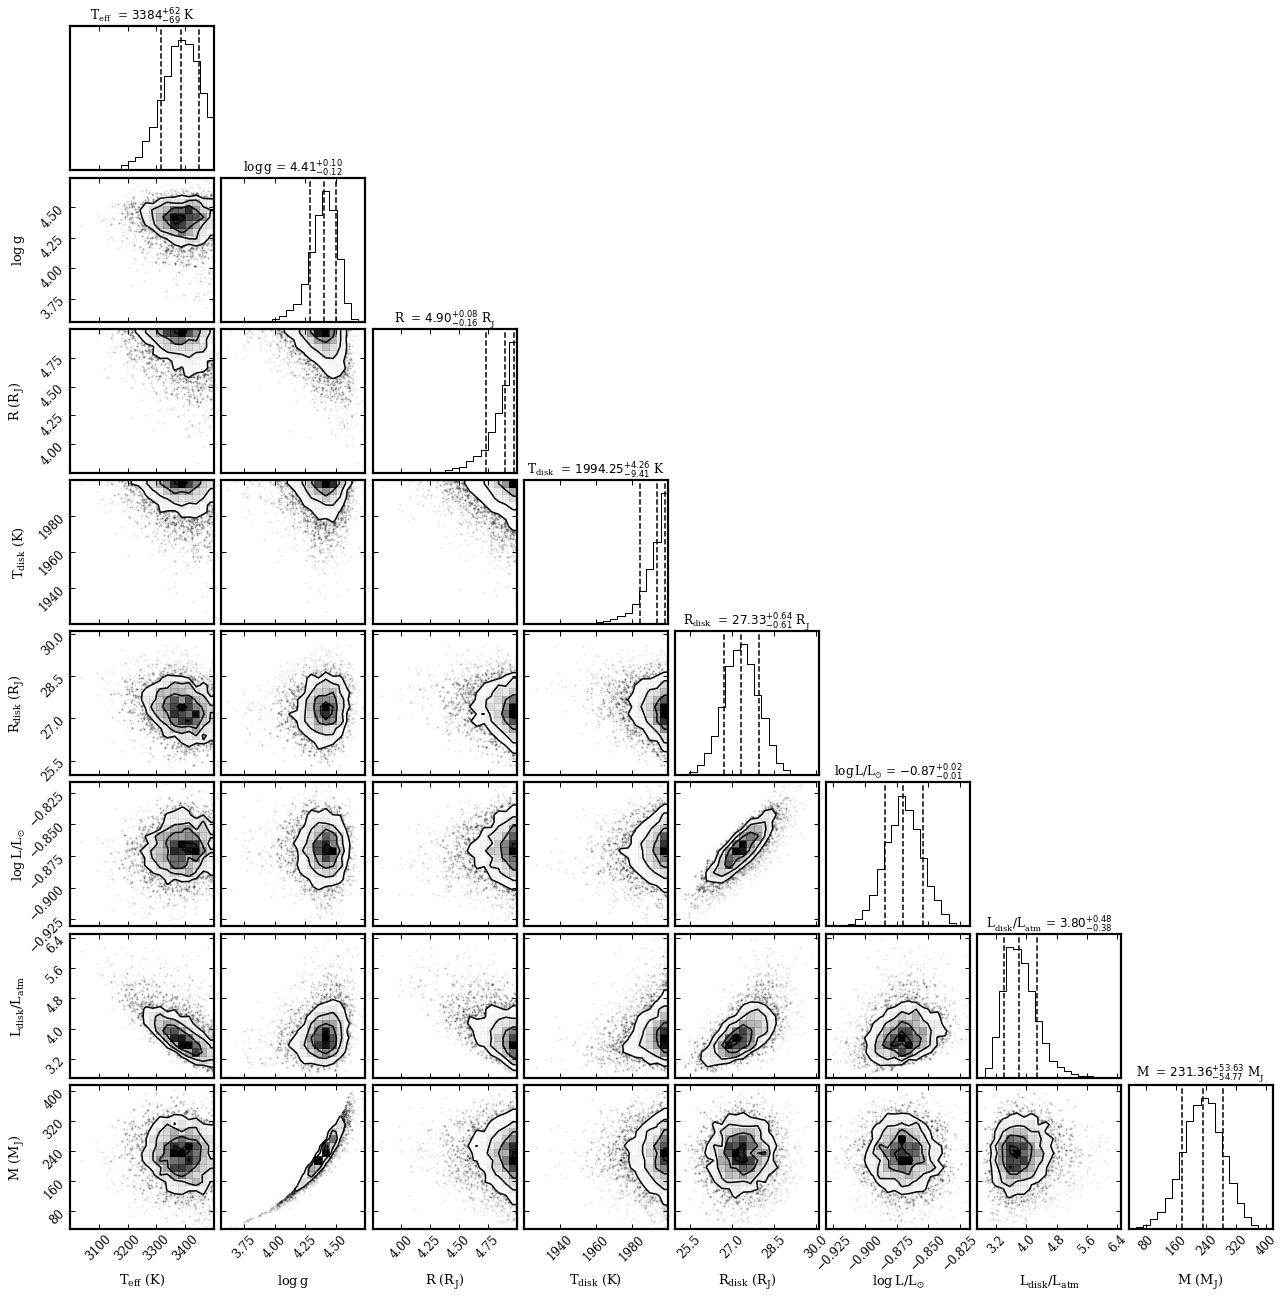

In [12]:
species.plot_posterior(tag='142',
                       offset=(-0.3 , -0.3),
                       title_fmt=['.0f', '.2f', '.2f', '.2f', '.2f', '.2f', '.2f', '.2f'],
                       inc_luminosity=True,
                       inc_mass=True,
                       output='posterior.png')
from IPython.display import Image
Image('posterior.png')

Getting MCMC spectra: 100%|██████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.37it/s]


Getting object: HD 142527 B... [DONE]
Calculating synthetic photometry... [DONE]
Calculating residuals... [DONE]
Residuals (sigma):
   - LCO/VisAO.Hac: -1.61
   - Paranal/NACO.J: 8.44
   - Paranal/NACO.H: -0.25
   - Paranal/NACO.H: 0.27
   - Paranal/NACO.Ks: -0.64
   - Paranal/NACO.Ks: 0.21
   - Paranal/NACO.Lp: -2.12
   - Paranal/NACO.Lp: -2.12
   - Paranal/NACO.Mp: -3.24
Calculating synthetic photometry... [DONE]
Plotting spectrum: spectrum.png... [DONE]


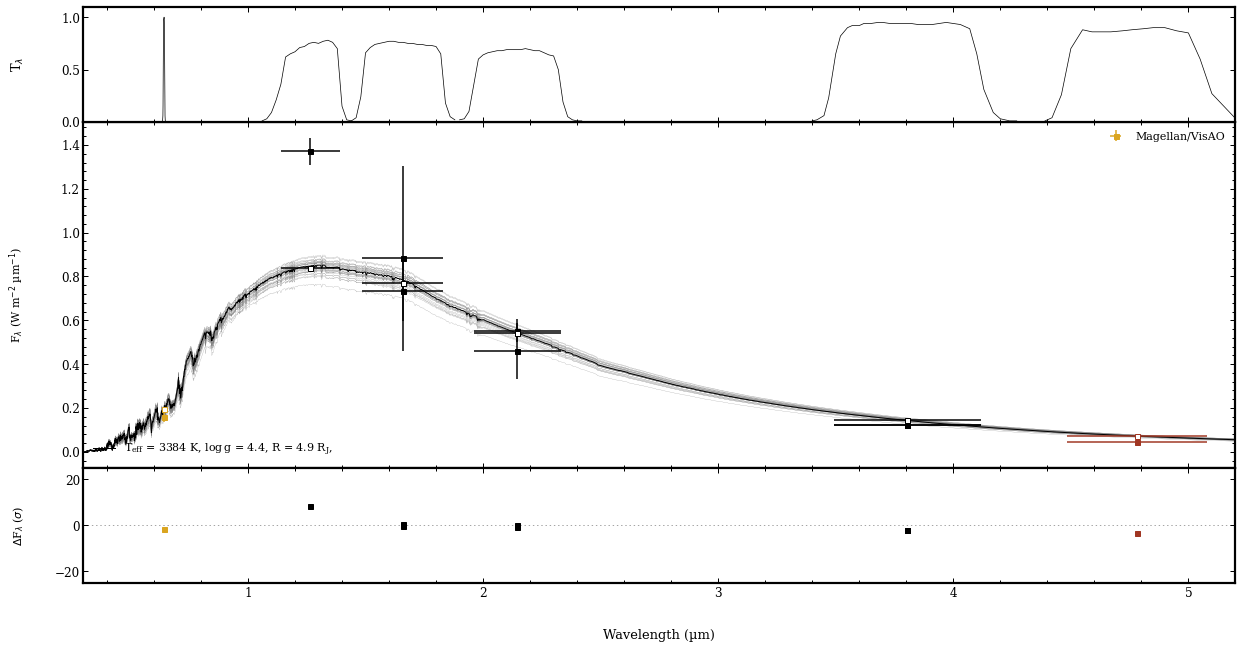

In [13]:
samples = database.get_mcmc_spectra(tag='142',
                                    random=30,
                                    wavel_range=None,
                                    spec_res=500.)

best = database.get_median_sample(tag='142')

read_model = species.ReadModel(model=model_choice,
                               wavel_range=None)
modelbox = read_model.get_model(model_param=best,
                                spec_res=500.,
                                smooth=True)
objectbox = database.get_object(object_name='HD 142527 B',
                                inc_phot=True,
                                inc_spec=True)
objectbox = species.update_spectra(objectbox=objectbox,
                                   model_param=best)

residuals = species.get_residuals(datatype='model',
                                  spectrum=model_choice,
                                  parameters=best,
                                  objectbox=objectbox,
                                  inc_phot=inc_phot,
                                  inc_spec=False)
synphot = species.multi_photometry(datatype='model',
                                   spectrum=model_choice,
                                   filters=objectbox.filters,
                                   parameters=best)

species.plot_spectrum(boxes=[samples, modelbox, objectbox, synphot],
                      filters=inc_phot,
                      residuals=residuals,
                      plot_kwargs=[{'ls': '-', 'lw': 0.2, 'color': 'gray'},
                                   {'ls': '-', 'lw': 1., 'color': 'black'},
                                   {'LCO/VisAO.Hac': {'marker': 's', 'ms': 5., 'color': 'goldenrod', 'ls': 'none', 'label': 'Magellan/VisAO'},
#                                     'Paranal/NACO.Lp':{'marker': 's', 'markersize': 5., 'color': 'xkcd:brick', 'ls': 'none', 'label': 'NACO'},
                                    'Paranal/NACO.Mp':{'marker': 's', 'markersize': 5., 'color': 'xkcd:brick', 'ls': 'none'}},
                                    None],
                      xlim=(0.3, 5.2),
#                       ylim=(-1e-18, 2e-13),
                      ylim_res=(-25., 25.),
                      scale=('linear', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'lower left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 11.}],
                      figsize=(16., 8.),
                      quantity='flux density',
                      output='spectrum.png')

Image('spectrum.png')